In [ ]:
from google.colab import drive
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import importlib

In [ ]:
drive.mount('/content/gdrive', force_remount=True)    

Mounted at /content/gdrive


In [ ]:
sys.path.append('/content/gdrive/My Drive/')
import fp_utilities as fp_util
import plot_utilities as plot_util

In [ ]:
importlib.reload(fp_util)

<module 'fp_utilities' from '/content/gdrive/My Drive/fp_utilities.py'>

In [ ]:
from shutil import copyfile
#generate images with the finetuned GANs to create test sets for evaluating the attribution algorithms on
def generate_finetune_test(start_epoch, end_epoch):
  for epoch in np.arange(start_epoch, end_epoch, 1):
    print("Epoch number ", epoch)
    fp_util.generate_test_batch(epoch)
    copyfile('/content/gdrive/My Drive/Diss/Images_Testing/Real_images.npy', '/content/gdrive/My Drive/Diss/Images_Testing/finetuned_epoch_{}/Real_images.npy'.format(epoch))


In [ ]:
generate_finetune_test(1,16)

Epoch number  1
Epoch number  2
Epoch number  3
Epoch number  4
Epoch number  5
Epoch number  6
Epoch number  7
Epoch number  8
Epoch number  9
Epoch number  10
Epoch number  11
Epoch number  12
Epoch number  13
Epoch number  14
Epoch number  15


In [ ]:
generate_finetune_test(16,21)

Epoch number  16
Epoch number  17
Epoch number  18
Epoch number  19
Epoch number  20


In [ ]:
generate_finetune_test(21,31)

Epoch number  21
Epoch number  22
Epoch number  23
Epoch number  24
Epoch number  25
Epoch number  26
Epoch number  27
Epoch number  28
Epoch number  29
Epoch number  30


In [ ]:
#attack strength = number of epochs the GANs are finetuned for
atk_strengths = np.arange(0,31,1)

In [ ]:
from sklearn.metrics import accuracy_score
marra_accuracies = []
yu_accuracies = []

In [ ]:
# calculate accuracy of attribution at different attack strengths 
for atk_strength in atk_strengths:
  marra_preds = fp_util.get_predictions('Marra', attack_mode="adv2", attack_strength=atk_strength)
  marra_accuracies.append(accuracy_score(fp_util.ground_truth, marra_preds))
  yu_preds = fp_util.get_predictions('Yu', attack_mode="adv2", attack_strength=atk_strength)
  yu_accuracies.append(accuracy_score(fp_util.ground_truth, yu_preds))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


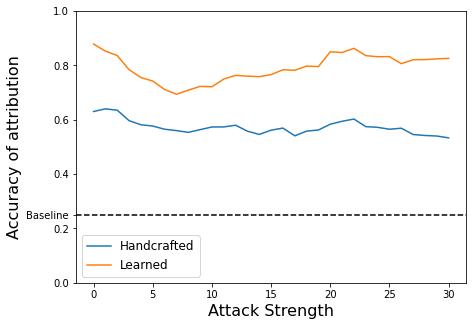

In [ ]:
import matplotlib.pyplot as plt

plot_util.plot_atk_accuracy_lines(atk_strengths, marra_accuracies, yu_accuracies)
plt.savefig('adv2-eval.pdf', bbox_inches = 'tight')

In [ ]:
#get predictions to visualise as confusion matrices for further analysis
marra_preds = fp_util.get_predictions('Marra', attack_mode="adv2", attack_strength=7)
yu_preds = fp_util.get_predictions('Yu', attack_mode="adv2", attack_strength=7)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


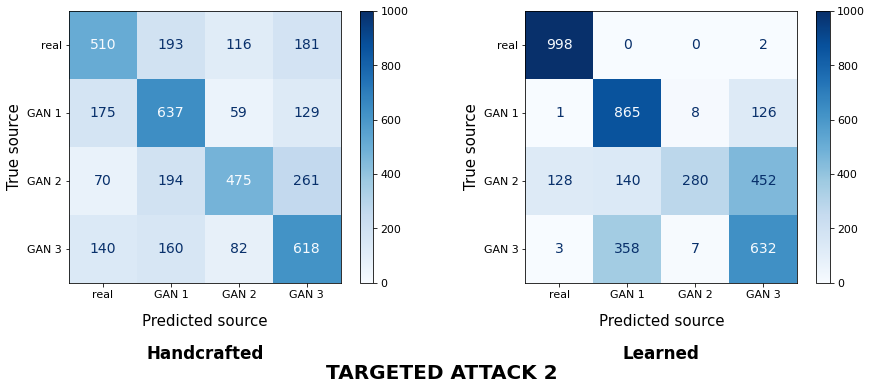

In [ ]:
plt.rcParams['font.size']=14
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
  
fig, ax = plt.subplots(1,2, figsize = (15,5))

plot_util.plot_confusion_matrix('Handcrafted' , marra_preds, ax[0])
plot_util.plot_confusion_matrix('Learned', yu_preds, ax[1])

plt.suptitle('TARGETED ATTACK 2', y = -0.1, fontsize = 20, fontweight='bold')
plt.savefig('adv2-conf-matrix.pdf', bbox_inches = 'tight')